In [1]:
from context import qnetvo as qnet
from context import utilities
from context import network_ansatzes
import matplotlib.pyplot as plt
from pennylane import numpy as np

In [2]:
data_path_param_shift = "../../script/data/ibm_casablanca_simple_trilocal_star_opt_parameter_shift/"

data_files_param_shift = utilities.get_data_files(data_path_param_shift, r".*")
param_shift_opt_dicts = [qnet.read_optimization_json(file) for file in data_files_param_shift]
print("num parameter shift optimizations : ", len(data_files_param_shift))

num parameter shift optimizations :  5


In [7]:
prep_nodes = [
    qnet.PrepareNode(1, [0, 3], qnet.ghz_state, 0),
    qnet.PrepareNode(1, [1, 4], qnet.ghz_state, 0),
    qnet.PrepareNode(1, [2, 5], qnet.ghz_state, 0),
]
meas_nodes = [
    qnet.MeasureNode(2, 2, [0], qnet.local_RY, 1),
    qnet.MeasureNode(2, 2, [1], qnet.local_RY, 1),
    qnet.MeasureNode(2, 2, [2], qnet.local_RY, 1),
    qnet.MeasureNode(2, 2, [3, 4, 5], qnet.local_RY, 3),
]

trilocal_ansatz = qnet.NetworkAnsatz(prep_nodes, meas_nodes)
trilocal_cost = qnet.nlocal_star_22_cost_fn(trilocal_ansatz)

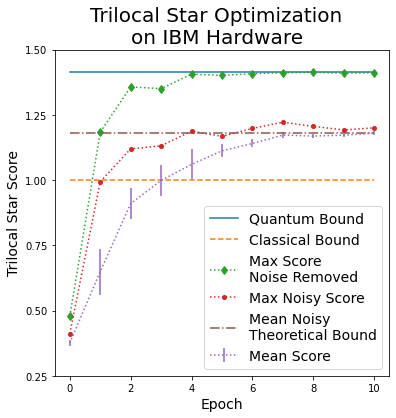

In [14]:
fig, ax1 = plt.subplots(1, 1, figsize=(6,6))
yticks = [0.25,0.5,0.75,1,1.25,1.5]

num_samples = 11

param_shift_data = utilities.opt_dicts_mean_stderr(param_shift_opt_dicts, num_samples)
param_shift_ideal_scores = [
    -(trilocal_cost(param_shift_data["opt_settings"][i])) for i in range(num_samples)
]

ax1.plot(range(num_samples), [np.sqrt(2)]*num_samples, "-", label="Quantum Bound")
ax1.plot(range(num_samples), [1]*num_samples, "--", label="Classical Bound")
ax1.plot(range(num_samples), param_shift_ideal_scores, ":d", markersize=6, label="Max Score\nNoise Removed")
ax1.plot(range(num_samples), param_shift_data["max_scores"], ":.", markersize=8 , label="Max Noisy Score")
ax1.errorbar(
    range(num_samples),
    param_shift_data["mean_scores"],
    param_shift_data["stderr_scores"],
    linestyle=":",
    label="Mean Score"
)
ax1.plot(
    range(num_samples),
    [param_shift_data["mean_theoretical_score"]] * num_samples,
    "-.",
    label="Mean Noisy\nTheoretical Bound"
)

# ax1.set_title("Parameter Gradient", size=16)
ax1.set_xlabel("Epoch", size=14)
ax1.set_ylabel("Trilocal Star Score", size=14)
ax1.set_yticks(yticks)
ax1.legend(loc="lower right", fontsize=14)

fig.suptitle("Trilocal Star Optimization\non IBM Hardware\n", size=20)
plt.show()